# matplotlibrc file (initial configuration)

- From matplotlib.matplotlib_fname(), we can check the location of the initial configuration (see below)
- If you want to manage the initial setting locally, you can copy the file "matplotlibrc" to ~/.config/matplotlib/
- The local folder should be in priority to read.
- change the setting in the configuration

Note that "%pylab inline" uses its own configuration for some parts (not all), you may need to force it down if you want to use the configuration regardless of "inline option"

- execute "ipython profile create"
- then "ipython_config.py" & "ipython_kernel_config.py" will be generated in "$HOME/.ipython/profile_default/" folder
- In the "ipython_kernel_config.py", add the line "c.InlineBackend.rc = {}"
- To remove the grey background color in the figure, you may need to set figure.facecolor to "white" in matplotlibrc configuration file.

In [3]:
import matplotlib as mpl
%matplotlib inline

print(mpl.matplotlib_fname())

/Users/astrodoo/.matplotlib/matplotlibrc


In [5]:
!cat /home/astrodoo/.config/matplotlib/matplotlibrc

### MATPLOTLIBRC FORMAT

# This is a sample matplotlib configuration file - you can find a copy
# of it on your system in
# site-packages/matplotlib/mpl-data/matplotlibrc.  If you edit it
# there, please note that it will be overwritten in your next install.
# If you want to keep a permanent local copy that will not be
# overwritten, place it in the following location:
# unix/linux:
#     $HOME/.config/matplotlib/matplotlibrc or
#     $XDG_CONFIG_HOME/matplotlib/matplotlibrc (if $XDG_CONFIG_HOME is set)
# other platforms:
#     $HOME/.matplotlib/matplotlibrc
#
# See http://matplotlib.org/users/customizing.html#the-matplotlibrc-file for
# more details on the paths which are checked for the configuration file.
#
# This file is best viewed in a editor which supports python mode
# syntax highlighting. Blank lines, or lines starting with a comment
# symbol, are ignored, as are trailing comments.  Other lines must
# have the format
#    key : val # optional comment
#
# Colors: for the color 

# tick format (eliminating the automatic offset)

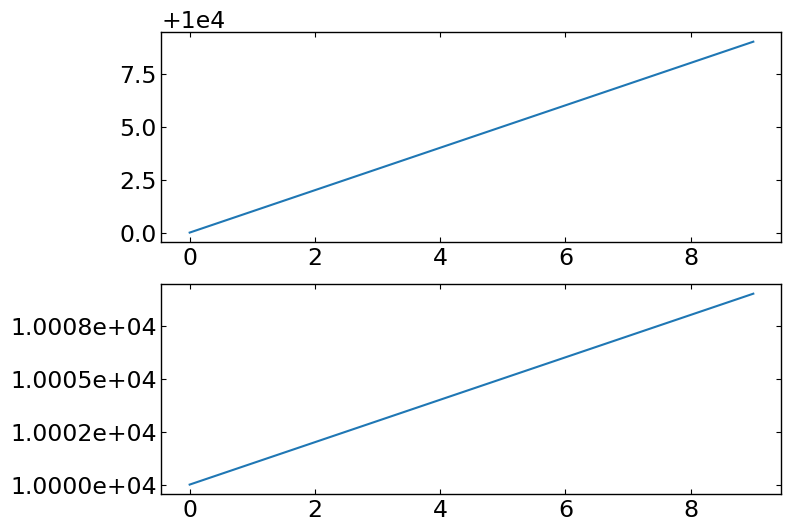

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np  

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(2)

ax1.plot(np.arange(10000,10010,1))

ax2.plot(np.arange(10000,10010,1))
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.4e'))

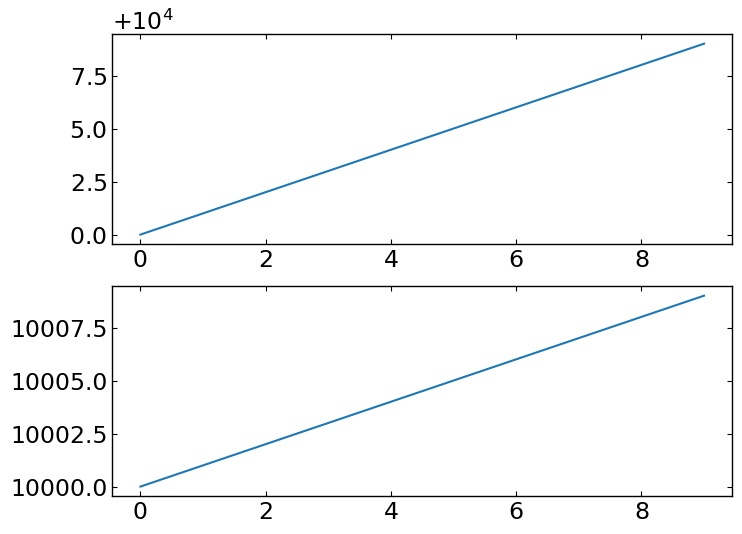

In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np  

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(2)

ax1.plot(np.arange(10000,10010,1))
formatter1 = mtick.ScalarFormatter(useMathText=True)
ax1.yaxis.set_major_formatter(formatter1)

ax2.plot(np.arange(10000,10010,1))
formatter = mtick.ScalarFormatter(useOffset=False)
ax2.yaxis.set_major_formatter(formatter)

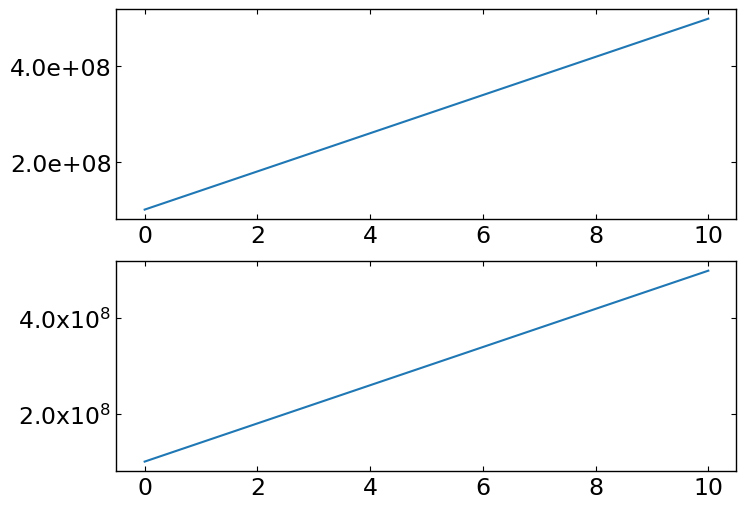

In [6]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np  

%matplotlib inline

fig,(ax1,ax2)=plt.subplots(2)

x = np.linspace(0,10,100)
y = np.linspace(1e8,5e8,100)

ax1.plot(x,y)
ax1.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1e'))

# y-value is devided by 1e8 for tick formatter
ax2.plot(x,y/1e8)
ax2.yaxis.set_major_formatter(mtick.FormatStrFormatter(r'%.1fx$10^{8}$'))

## Func formatter

[-5 -4 -3 -2 -1  0  1  2  3  4]


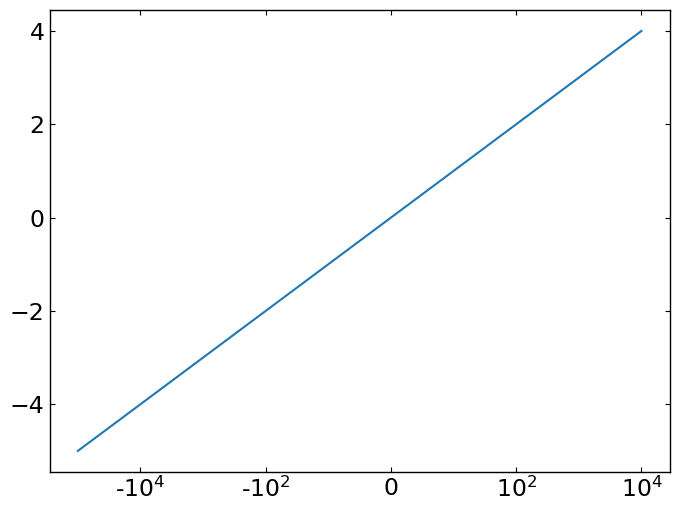

In [8]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def format_tick(x,pos=None):
    xabs = np.abs(x)

    if x>0:
        xstr = r'$10^{%i}$'%(xabs)
    elif x<0:
        xstr = r'-$10^{%i}$'%(xabs)
    else:
        xstr = '0'
        
    return xstr
    

x = np.arange(10)-5

print(x)

fig,ax = plt.subplots()

ax.plot(x,x)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(format_tick))

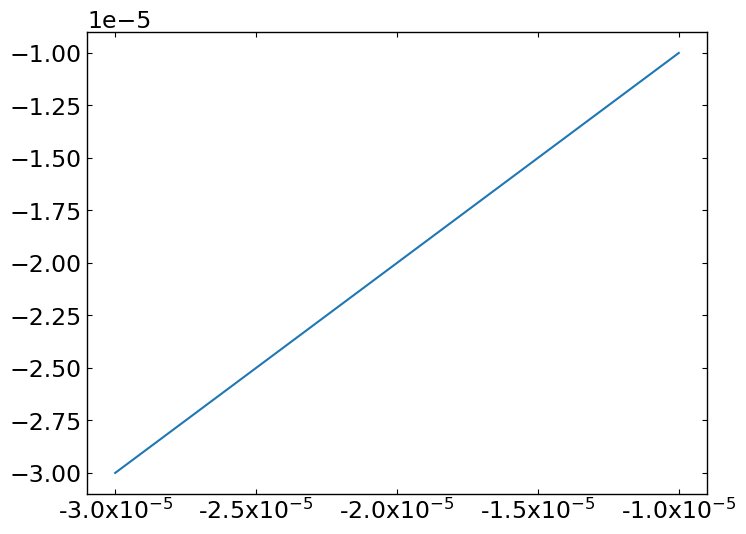

In [9]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

def format_tick(x,pos=None):
    xstr_e = '%e'%x
    xsplt = xstr_e.split('e')
    xfact = float(xsplt[0])
    xexp  = int(xsplt[1])
        
    if x != 0:
        xstr = r'%.1fx$10^{%i}$'%(xfact,xexp)
    else:
        xstr = '0'
        
    return xstr

x = np.linspace(-1e-5,-3e-5,1000)

fig,ax = plt.subplots()

ax.plot(x,x)
ax.xaxis.set_major_formatter(mtick.FuncFormatter(format_tick))

## Major ticks & Minor ticks

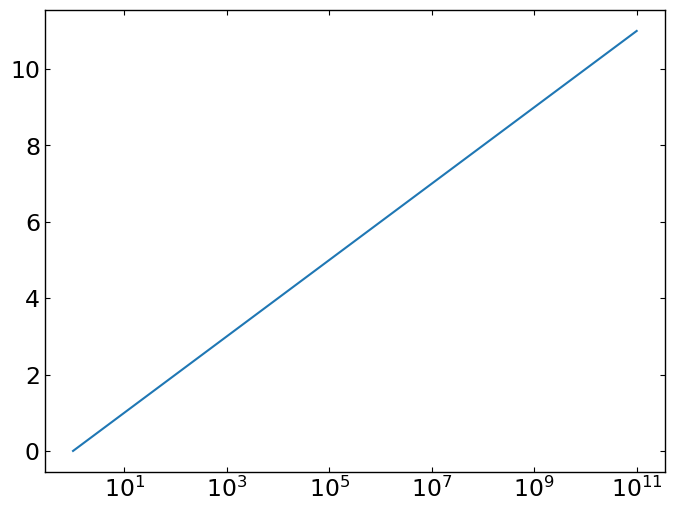

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

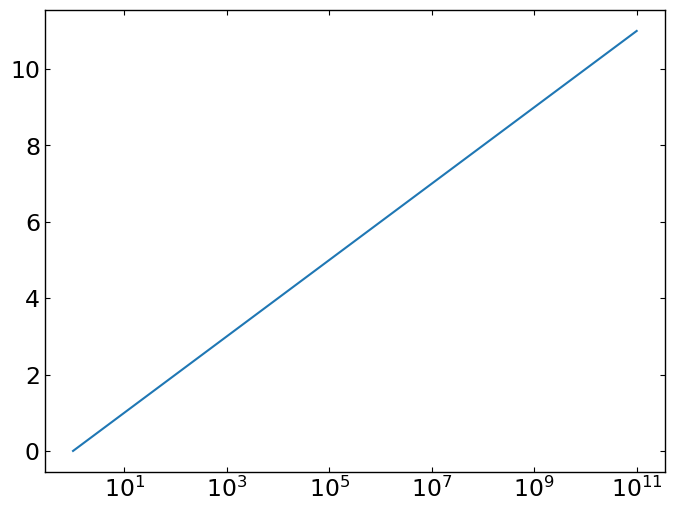

In [11]:
""" Log scale; modify number of major ticks (1st method) """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

ax.locator_params(axis='x',numticks=12)

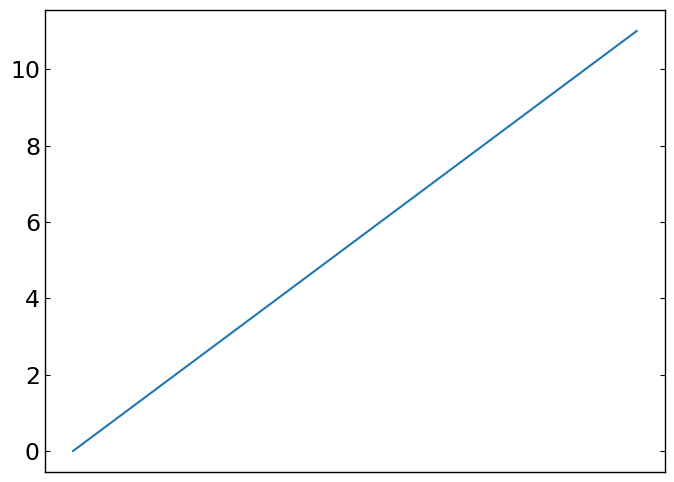

In [12]:
""" Log scale; modify number of major ticks (2nd method) """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax.xaxis.set_major_locator(locmaj)

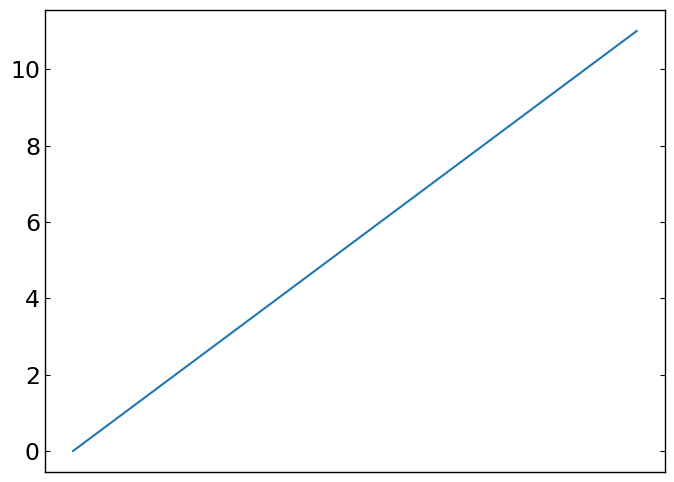

In [13]:
""" Log scale; modify number of minor ticks """
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

locmaj = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,1.0, ))
ax.xaxis.set_major_locator(locmaj)

# sub should be over two decades !!!
locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 ))  
ax.xaxis.set_minor_locator(locmin)
ax.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

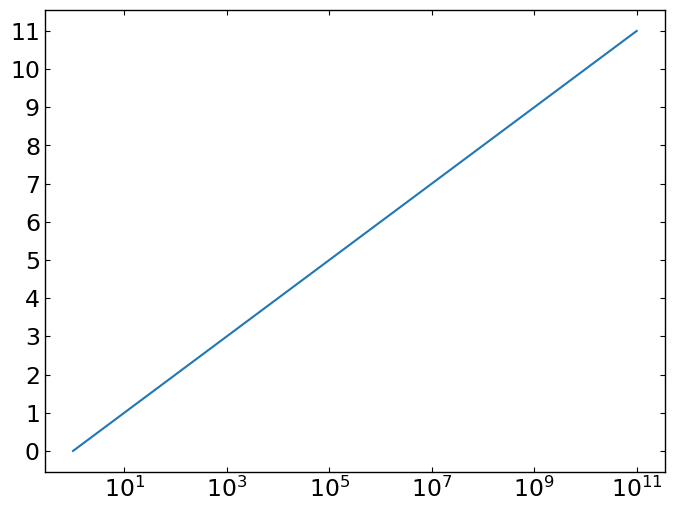

In [14]:
""" linear scale; modify number of major ticks """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

ax.locator_params(axis='y',nbins=15)

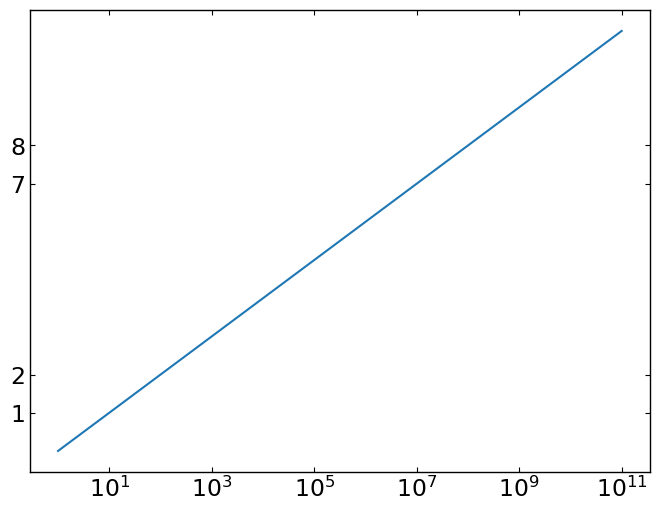

In [15]:
""" linear scale; specify the major ticks """

import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
%matplotlib inline 

y = np.arange(12)
x = 10.0**y

fig, ax=plt.subplots()
ax.semilogx(x,y)

ax.set_yticks((1,2,7,8))

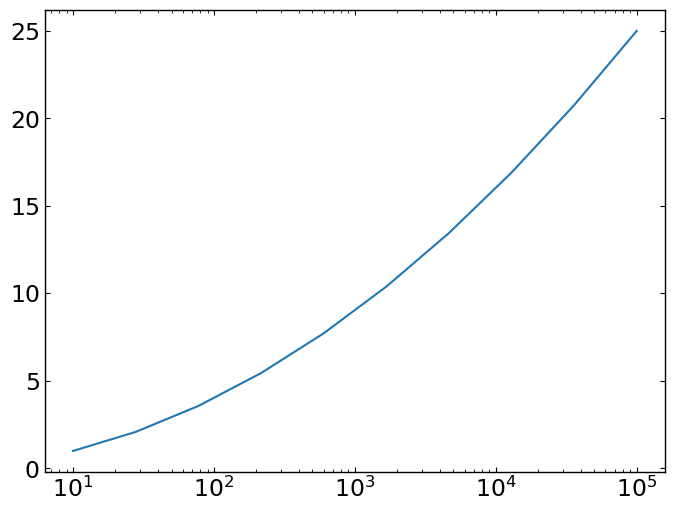

In [16]:
""" Special Case: when axis has a data of exponent """

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

%matplotlib inline

x = np.linspace(1,5,10)  # represent 10 ~ 10^5
y = x*x

fig, ax = plt.subplots()

ax.plot(x,y)

# recover the format of 10^exponent
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter(r'$10^{%i}$'))

## set minor-tick configuration
xr = ax.get_xlim()
xmin = int(xr[0])-1; xmax = int(xr[1])+2
majortk = range(xmin,xmax); lmj = len(majortk)
minortk = np.asarray([np.log10(i) for i in range(2,10)]); lmi = len(minortk)

minortks = np.zeros(lmj*lmi)
for i, imj in enumerate(majortk):
    minortks[i*lmi:i*lmi+lmi] = imj + minortk[:]

locminor = mtick.FixedLocator(minortks)
ax.xaxis.set_minor_locator(locminor)

## tick params & label margin

Text(0, 0.5, 'hey')

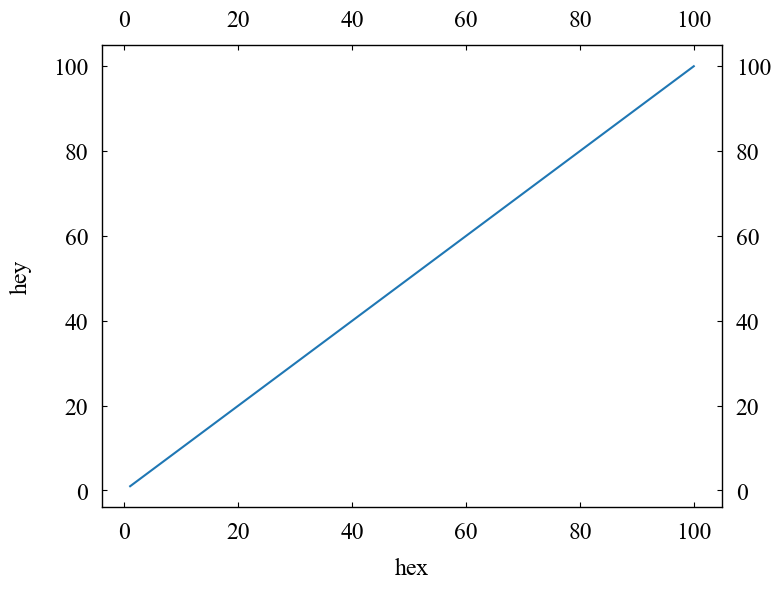

In [12]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

xx = np.linspace(1,100)

fig,ax = plt.subplots()

ax.plot(xx,xx)
ax.tick_params(labelleft=True, labelright=True, labeltop=True, labelbottom=True, pad=10)  #pad is margin
ax.set_xlabel('hex', labelpad=10)
ax.set_ylabel('hey', labelpad=15)

# Polar plots

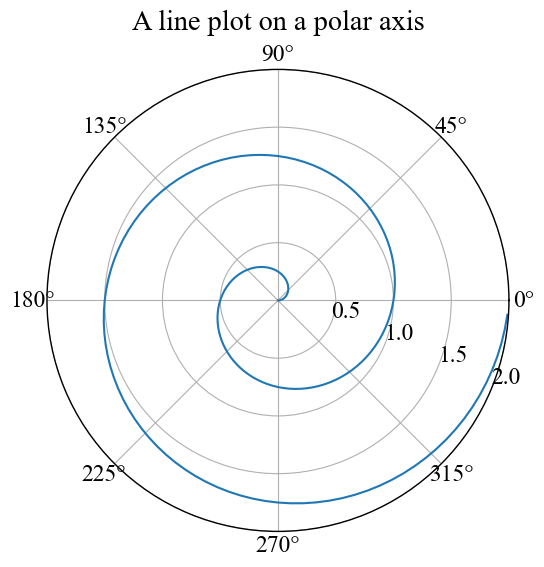

In [18]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

ax.set_title("A line plot on a polar axis", va='bottom')
plt.show()

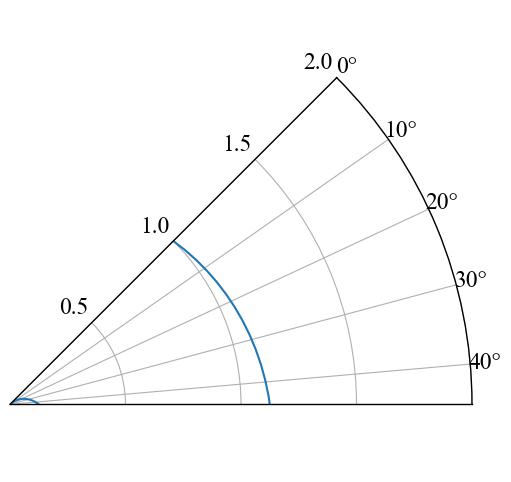

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

r = np.arange(0, 2, 0.01)
theta = 2 * np.pi * r

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(theta, r)
ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_theta_direction(-1)
ax.set_thetalim(0, np.pi/4.)
ax.set_theta_offset(np.pi / 4.0)
#ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)

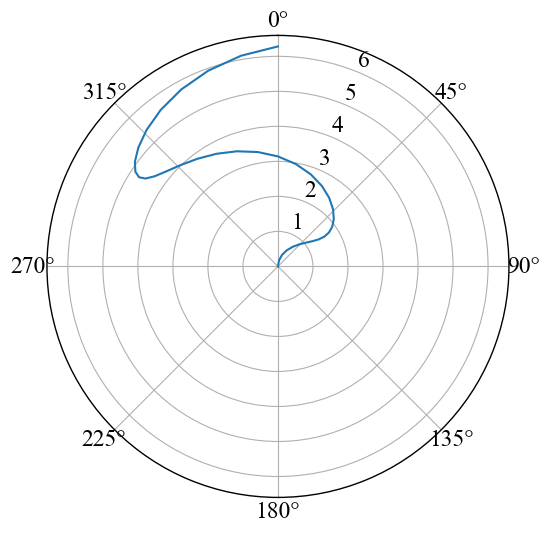

In [14]:
import numpy as np
from matplotlib import pyplot as plt
#plt.rcParams["figure.figsize"] = [7.00, 3.50]
#plt.rcParams["figure.autolayout"] = True
ax = plt.subplot(1, 1, 1, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2.0)
theta = np.linspace(0, 2 * np.pi, 37)
ax.plot(np.sin(theta), theta)
plt.show()

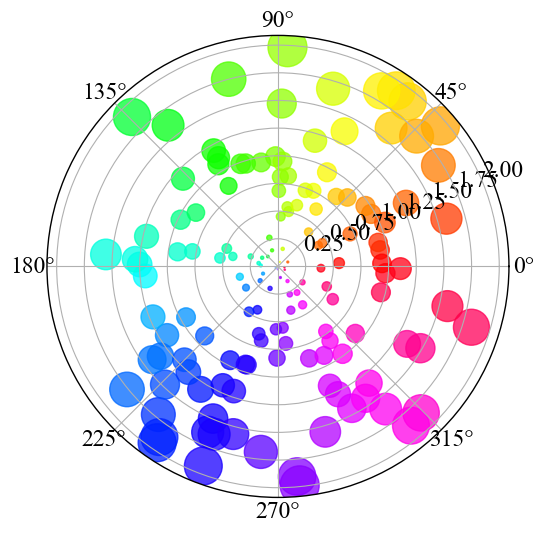

In [15]:
import numpy as np
import matplotlib.pyplot as plt


# Fixing random state for reproducibility
np.random.seed(19680800)

# Compute areas and colors
N = 150
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 200 * r**2
colors = theta

fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

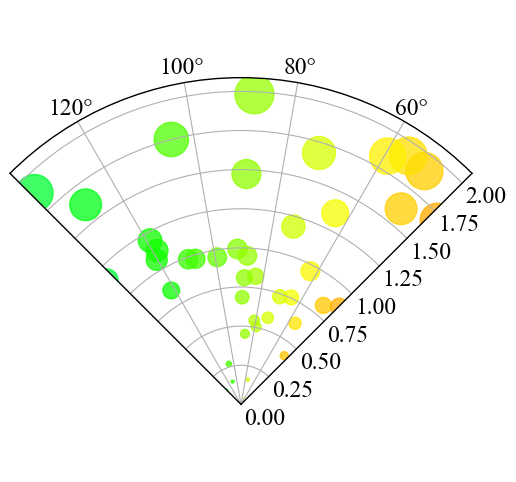

In [16]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='hsv', alpha=0.75)

ax.set_thetamin(45)
ax.set_thetamax(135)

plt.show()

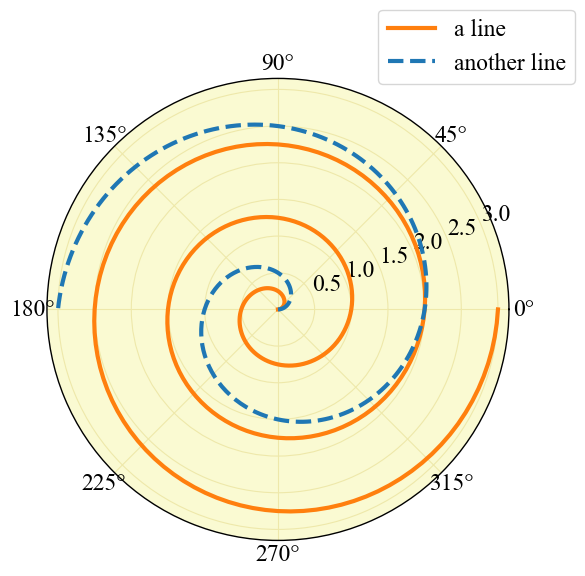

In [17]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection="polar", facecolor="lightgoldenrodyellow")

r = np.linspace(0, 3, 301)
theta = 2 * np.pi * r
ax.plot(theta, r, color="tab:orange", lw=3, label="a line")
ax.plot(0.5 * theta, r, color="tab:blue", ls="--", lw=3, label="another line")
ax.tick_params(grid_color="palegoldenrod")
# For polar axes, it may be useful to move the legend slightly away from the
# axes center, to avoid overlap between the legend and the axes.  The following
# snippet places the legend's lower left corner just outside of the polar axes
# at an angle of 67.5 degrees in polar coordinates.
angle = np.deg2rad(67.5)
ax.legend(loc="lower left",
          bbox_to_anchor=(.5 + np.cos(angle)/2, .5 + np.sin(angle)/2))

plt.show()